# Homework 1

## FINM 35700 - Spring 2025

### UChicago Financial Mathematics

* Matheus Raka Pradnyatama
* matheusraka@uchicago.edu

In [ ]:
import pandas as pd
import numpy as np
import datetime
import holidays
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# The code is made with the help of OpenAI's ChatGPT.

This homework relies on:

- the government and corporate bonds symbology file `bond_symbology`, 
- the "on-the-run" treasuries data file `govt_on_the_run` and
- the market data file `market_prices_eod`.


You can find more details on US treasury instruments in the FINM 37400 Fixed Income course.



------------------------------------------------------------------------------------------
# Problem 1: Explore symbology for US treasury bonds

## a. Load and explore US government bond symbology

Load the `bond_symbology` Excel file into a dataframe. It contains symbology for both government and corporate bonds as of 2024-12-13.

Select US Treasury bonds only (class = 'Govt', ticker = 'T'). For each government bond issue, calculate its initial `term` in years (based on issue date and maturity date), as well as the current `TTM` (time-to-maturity) and extend the dataframe. Assume a year has 365.25 days.



In [387]:
# Bond Symbology Dataframe = Containing both corporate and US Government Bonds

filepath_rawdata = f'./data/bond_symbology.xlsx'
bond_symbology = pd.read_excel(filepath_rawdata)

days_in_year = 365.25
date_today = pd.to_datetime('2024-12-13')

bond_symbology['term'] = ((bond_symbology['maturity']) - bond_symbology['start_date']).dt.days / days_in_year
bond_symbology['TTM'] = ((bond_symbology['maturity'] - date_today)).dt.days / days_in_year

# If TTM is less than or equal to 0, then it's 0
bond_symbology.loc[bond_symbology['TTM'] <= 0, 'TTM'] = 0

bond_symbology.head(3)

,ticker,class,figi,isin,und_bench_isin,security,name,type,coupon,cpn_type,...,acc_first,maturity,mty_typ,rank,amt_out,country,currency,status,term,TTM
0,AAPL,Corp,BBG004HST0K7,US037833AL42,US912810UF39,AAPL 3.85 05/04/43,APPLE INC,GLOBAL,3.85,FIXED,...,2013-05-03,2043-05-04,AT MATURITY,Sr Unsecured,3000.0,US,USD,ACTV,30.001369,18.387406
1,AAPL,Corp,BBG006F8VWJ7,US037833AT77,US912810UF39,AAPL 4.45 05/06/44,APPLE INC,GLOBAL,4.45,FIXED,...,2014-05-06,2044-05-06,AT MATURITY,Sr Unsecured,1000.0,US,USD,ACTV,30.001369,19.394935
2,AAPL,Corp,BBG0081TNL50,US037833BA77,US912810UF39,AAPL 3.45 02/09/45,APPLE INC,GLOBAL,3.45,FIXED,...,2015-02-09,2045-02-09,AT MATURITY,Sr Unsecured,2000.0,US,USD,ACTV,30.001369,20.158795


In [388]:
# Treasury Symbology Dataframe

symbology_treasury = bond_symbology[(bond_symbology['class'] == 'Govt') & (bond_symbology['ticker'] == 'T')]
display(symbology_treasury.head())
display(symbology_treasury.tail())

,ticker,class,figi,isin,und_bench_isin,security,name,type,coupon,cpn_type,...,acc_first,maturity,mty_typ,rank,amt_out,country,currency,status,term,TTM
135,T,Govt,BBG000DKHP42,US912810EG95,US9127963M90,T 8 3/4 08/15/20,US TREASURY N/B,US GOVERNMENT,8.750,FIXED,...,1990-08-15,2020-08-15,NORMAL,Unsecured,17059.0,US,USD,INAC,30.001369,0.0
136,T,Govt,BBG000DJN4B7,US912810EH78,NaN,T 7 7/8 02/15/21,US TREASURY N/B,US GOVERNMENT,7.875,FIXED,...,1991-02-15,2021-02-15,NORMAL,Unsecured,10076.0,US,USD,INAC,30.001369,0.0
137,T,Govt,BBG000DHBM88,US912810EJ35,NaN,T 8 1/8 05/15/21,US TREASURY N/B,US GOVERNMENT,8.125,FIXED,...,1991-05-15,2021-05-15,NORMAL,Unsecured,10067.0,US,USD,INAC,30.001369,0.0
138,T,Govt,BBG000DKP182,US912810EK08,NaN,T 8 1/8 08/15/21,US TREASURY N/B,US GOVERNMENT,8.125,FIXED,...,1991-08-15,2021-08-15,NORMAL,Unsecured,9506.0,US,USD,INAC,30.001369,0.0
139,T,Govt,BBG000DFRYP0,US912810EL80,NaN,T 8 11/15/21,US TREASURY N/B,US GOVERNMENT,8.000,FIXED,...,1991-11-15,2021-11-15,NORMAL,Unsecured,30632.0,US,USD,INAC,30.001369,0.0


,ticker,class,figi,isin,und_bench_isin,security,name,type,coupon,cpn_type,...,acc_first,maturity,mty_typ,rank,amt_out,country,currency,status,term,TTM
715,T,Govt,BBG01QZFYJV6,US91282CLY56,US91282CLY56,T 4 1/4 11/30/26,US TREASURY N/B,US GOVERNMENT,4.250,FIXED,...,2024-11-30,2026-11-30,NORMAL,Unsecured,73693.0,US,USD,ACTV,1.993155,1.963039
716,T,Govt,BBG01QZFYD58,US91282CMA61,US91282CMA61,T 4 1/8 11/30/29,US TREASURY N/B,US GOVERNMENT,4.125,FIXED,...,2024-11-30,2029-11-30,NORMAL,Unsecured,74761.0,US,USD,ACTV,4.993840,4.963723
717,T,Govt,BBG01QZFYCF9,US91282CLZ22,US91282CLZ22,T 4 1/8 11/30/31,US TREASURY N/B,US GOVERNMENT,4.125,FIXED,...,2024-11-30,2031-11-30,NORMAL,Unsecured,46993.0,US,USD,ACTV,6.992471,6.962355
718,T,Govt,BBG01QVTC1Y0,US912810UF39,US912810UF39,T 4 5/8 11/15/44,US TREASURY N/B,US GOVERNMENT,4.625,FIXED,...,2024-11-15,2044-11-15,NORMAL,Unsecured,17088.0,US,USD,ACTV,19.953457,19.923340
719,T,Govt,BBG01R4Z7Y32,US91282CMB45,US91282CMB45,T 4 12/15/27,US TREASURY N/B,US GOVERNMENT,4.000,FIXED,...,2024-12-15,2027-12-15,NORMAL,Unsecured,58415.0,US,USD,ACTV,2.995209,3.003422


## b. Historical time series of US treasury coupons 

Plot the time series of coupons for for US treasury notes/bonds issued since 2015 (indexed by issue date). 
What can you say about the overall level of issued coupons since 2020?


In [389]:
ref_date = pd.to_datetime('2015-01-01')

# Take everything from the reference date
bond_issued_2015_onwards = symbology_treasury[symbology_treasury['start_date'] >= ref_date]

# Set the start date as the index
bond_issued_2015_onwards.set_index('start_date',inplace=True)

bond_issued_2015_onwards.head()

,ticker,class,figi,isin,und_bench_isin,security,name,type,coupon,cpn_type,...,acc_first,maturity,mty_typ,rank,amt_out,country,currency,status,term,TTM
start_date,,,,,,,,,,,,,,,,,,,,,
2015-02-02,T,Govt,BBG00801DCH0,US912828H862,NaN,T 1 1/2 01/31/22,US TREASURY N/B,US GOVERNMENT,1.500,FIXED,...,2015-01-31,2022-01-31,NORMAL,Unsecured,29000.0,US,USD,INAC,6.995209,0.000000
2015-02-17,T,Govt,BBG00827QXY6,US912828J272,US912797NG83,T 2 02/15/25,US TREASURY N/B,US GOVERNMENT,2.000,FIXED,...,2015-02-15,2025-02-15,NORMAL,Unsecured,65603.0,US,USD,ACTV,9.995893,0.175222
2015-02-17,T,Govt,BBG00827QS68,US912810RK60,US912810UF39,T 2 1/2 02/15/45,US TREASURY N/B,US GOVERNMENT,2.500,FIXED,...,2015-02-15,2045-02-15,NORMAL,Unsecured,42001.0,US,USD,ACTV,29.995893,20.175222
2015-03-02,T,Govt,BBG0084GPDH8,US912828J504,NaN,T 1 3/8 02/29/20,US TREASURY N/B,US GOVERNMENT,1.375,FIXED,...,2015-02-28,2020-02-29,NORMAL,Unsecured,0.0,US,USD,INAC,4.996578,0.000000
2015-03-02,T,Govt,BBG0084GPDG9,US912828J439,NaN,T 1 3/4 02/28/22,US TREASURY N/B,US GOVERNMENT,1.750,FIXED,...,2015-02-28,2022-02-28,NORMAL,Unsecured,29000.0,US,USD,INAC,6.995209,0.000000


In [390]:
# Dataframe for Coupon Rate
data_coupon = bond_issued_2015_onwards[['coupon']]
data_coupon.head()

,coupon
start_date,
2015-02-02,1.500
2015-02-17,2.000
2015-02-17,2.500
2015-03-02,1.375
2015-03-02,1.750


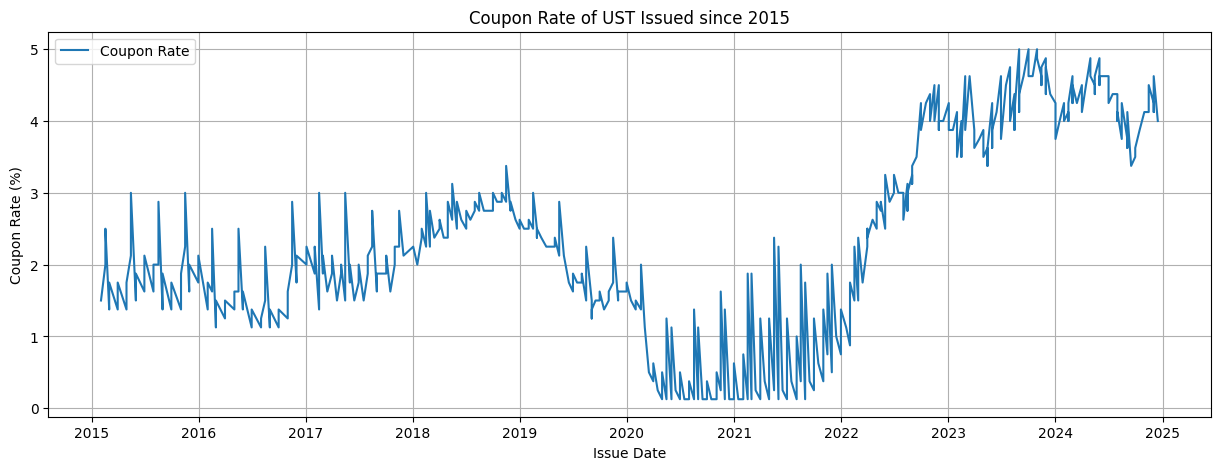

In [391]:
plt.figure(figsize=(15, 5))
plt.plot(data_coupon, linestyle='-', label="Coupon Rate")

# Labels and title
plt.xlabel("Issue Date")
plt.ylabel("Coupon Rate (%)")
plt.title("Coupon Rate of UST Issued since 2015")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Since 2020, coupon rate of UST has been increasing. It was steadily decreasing from 2019 until 2020 (this coincides with the Fed cutting the interest rates until around 0%). From 2022 until 2024, the Fed hiked interest rates by 500 bps, which is why we are also seeing a steep increase in coupon rates of UST during that period. 

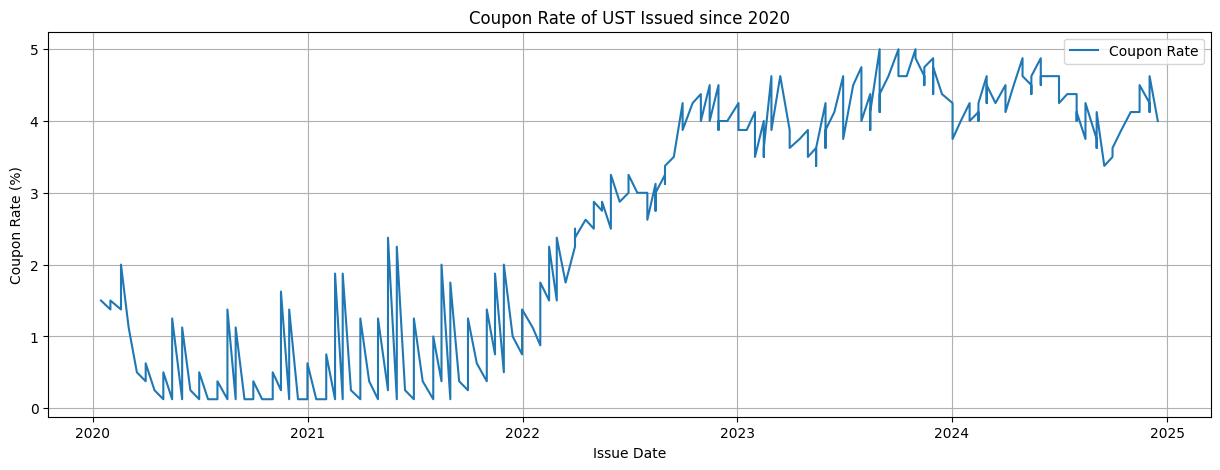

,coupon
count,295.000000
mean,2.570339
std,1.669119
min,0.125000
25%,0.875000
50%,3.000000
75%,4.125000
max,5.000000


In [392]:
ref_date = pd.to_datetime('2020-01-01')

# Take everything from the reference date
bond_issued_2020_onwards = symbology_treasury[symbology_treasury['start_date'] >= ref_date]

# Set the start date as the index
bond_issued_2020_onwards.set_index('start_date',inplace=True)

# Dataframe for Coupon Rate
data_coupon_2020 = bond_issued_2020_onwards[['coupon']]

plt.figure(figsize=(15, 5))
plt.plot(data_coupon_2020, linestyle='-', label="Coupon Rate")

# Labels and title
plt.xlabel("Issue Date")
plt.ylabel("Coupon Rate (%)")
plt.title("Coupon Rate of UST Issued since 2020")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Describe the data
data_coupon_2020.describe()

What can you say about the overall level of issued coupons since 2020?

Based on the summary statistics provided, we can make following observations:

- The average (mean) coupon rate is 2.57%
- The median coupon rate (50th percentile) is 3%
- The minimum coupon rate is 0.125%, while the maximum is 5.00%.
- The coupon rate increased from decade lows of 0.125% in 2020, to decade highs of 5.00% in 2024.

## c. Load the on-the-run US treasuries

Load the `govt_on_the_run` Excel file into a dataframe. Select the current on-the-run 2Y, 3Y, 5Y, 7Y, 10Y, 20Y and 30Y issues (off-the-run issues have the B & C suffix). Create a separate symbology dataframe for on-the-run treasuries only, to be used later on for the on-the-run government yield curve bootstrapping.

In [393]:
filepath_rawdata = f'./data/govt_on_the_run.xlsx'
data_ust = pd.read_excel(filepath_rawdata)
data_ust.head(3)

,ticker,date,figi,isin
0,GT10 Govt,2024-12-13,BBG01QKHSMP5,US91282CLW90
1,GT10B Govt,2024-12-13,BBG01P1YBJQ5,US91282CLF67
2,GT10C Govt,2024-12-13,BBG01MPC8VJ9,US91282CKQ32


In [394]:
# On the Run Treasuries

# r'[BC] Govt$' matches string that ends with B Govt or C Govt
# ~ negates the filter, showing rows that DO NOT match the filter (those that don't have BC)
df_ontherun = data_ust[~data_ust['ticker'].str.contains(r'[BC] Govt$', regex=True)]
df_ontherun

,ticker,date,figi,isin
0,GT10 Govt,2024-12-13,BBG01QKHSMP5,US91282CLW90
3,GT2 Govt,2024-12-13,BBG01QZFYJV6,US91282CLY56
4,GT20 Govt,2024-12-13,BBG01QVTC1Y0,US912810UF39
9,GT3 Govt,2024-12-13,BBG01R4Z7Y32,US91282CMB45
10,GT30 Govt,2024-12-13,BBG01QKHSL31,US912810UE63
15,GT5 Govt,2024-12-13,BBG01QZFYD58,US91282CMA61
18,GT7 Govt,2024-12-13,BBG01QZFYCF9,US91282CLZ22


In [395]:
# ISIN for On-the-Run Treasuries
ontherun_isin = df_ontherun[['isin']]
ontherun_isin

,isin
0,US91282CLW90
3,US91282CLY56
4,US912810UF39
9,US91282CMB45
10,US912810UE63
15,US91282CMA61
18,US91282CLZ22


In [396]:
# Symbology Dataframe for On-the-Run Treasuries

# Merge Dataframe
symbology_treasury_ontherun = pd.merge(symbology_treasury, ontherun_isin, on='isin', how='inner')
symbology_treasury_ontherun = symbology_treasury_ontherun.sort_values(by='TTM')
display(symbology_treasury_ontherun)

,ticker,class,figi,isin,und_bench_isin,security,name,type,coupon,cpn_type,...,acc_first,maturity,mty_typ,rank,amt_out,country,currency,status,term,TTM
2,T,Govt,BBG01QZFYJV6,US91282CLY56,US91282CLY56,T 4 1/4 11/30/26,US TREASURY N/B,US GOVERNMENT,4.250,FIXED,...,2024-11-30,2026-11-30,NORMAL,Unsecured,73693.0,US,USD,ACTV,1.993155,1.963039
6,T,Govt,BBG01R4Z7Y32,US91282CMB45,US91282CMB45,T 4 12/15/27,US TREASURY N/B,US GOVERNMENT,4.000,FIXED,...,2024-12-15,2027-12-15,NORMAL,Unsecured,58415.0,US,USD,ACTV,2.995209,3.003422
3,T,Govt,BBG01QZFYD58,US91282CMA61,US91282CMA61,T 4 1/8 11/30/29,US TREASURY N/B,US GOVERNMENT,4.125,FIXED,...,2024-11-30,2029-11-30,NORMAL,Unsecured,74761.0,US,USD,ACTV,4.993840,4.963723
4,T,Govt,BBG01QZFYCF9,US91282CLZ22,US91282CLZ22,T 4 1/8 11/30/31,US TREASURY N/B,US GOVERNMENT,4.125,FIXED,...,2024-11-30,2031-11-30,NORMAL,Unsecured,46993.0,US,USD,ACTV,6.992471,6.962355
0,T,Govt,BBG01QKHSMP5,US91282CLW90,US91282CLW90,T 4 1/4 11/15/34,US TREASURY N/B,US GOVERNMENT,4.250,FIXED,...,2024-11-15,2034-11-15,NORMAL,Unsecured,91486.0,US,USD,ACTV,9.998631,9.921971
5,T,Govt,BBG01QVTC1Y0,US912810UF39,US912810UF39,T 4 5/8 11/15/44,US TREASURY N/B,US GOVERNMENT,4.625,FIXED,...,2024-11-15,2044-11-15,NORMAL,Unsecured,17088.0,US,USD,ACTV,19.953457,19.923340
1,T,Govt,BBG01QKHSL31,US912810UE63,US912810UE63,T 4 1/2 11/15/54,US TREASURY N/B,US GOVERNMENT,4.500,FIXED,...,2024-11-15,2054-11-15,NORMAL,Unsecured,53231.0,US,USD,ACTV,29.998631,29.921971


## d. Compute the total amount of US Treasuries issued / matured every year since 2015

Column `amt_out` contains the issue amount outstanding, expressed in $MM.

Compute the total amount of US Treasuries issued every year since 2015.
Compute the total amount of US Treasuries matured every year since 2015.

Plot the results.

In [397]:
# This is dataframe of UST issued
bond_issued = symbology_treasury[['ticker', 'class', 'isin', 'security', 'start_date', 'maturity', 'amt_out']]
bond_issued.set_index('start_date', inplace=True)
bond_issued.head()

,ticker,class,isin,security,maturity,amt_out
start_date,,,,,,
1990-08-15,T,Govt,US912810EG95,T 8 3/4 08/15/20,2020-08-15,17059.0
1991-02-15,T,Govt,US912810EH78,T 7 7/8 02/15/21,2021-02-15,10076.0
1991-05-15,T,Govt,US912810EJ35,T 8 1/8 05/15/21,2021-05-15,10067.0
1991-08-15,T,Govt,US912810EK08,T 8 1/8 08/15/21,2021-08-15,9506.0
1991-11-15,T,Govt,US912810EL80,T 8 11/15/21,2021-11-15,30632.0


In [398]:
# 2015
ref_date_1 = '2015-01-01'
ref_date_2 = '2015-12-31'

# Take everything between the reference dates
bond_filtered = bond_issued[(bond_issued.index >= ref_date_1) & (bond_issued.index <= ref_date_2)]
display(bond_filtered.head())

bond_issued_2015 = bond_filtered['amt_out'].sum()
print(f"UST Issued in 2015 ($MM): {bond_issued_2015:,}")

,ticker,class,isin,security,maturity,amt_out
start_date,,,,,,
2015-02-02,T,Govt,US912828H862,T 1 1/2 01/31/22,2022-01-31,29000.0
2015-02-17,T,Govt,US912828J272,T 2 02/15/25,2025-02-15,65603.0
2015-02-17,T,Govt,US912810RK60,T 2 1/2 02/15/45,2045-02-15,42001.0
2015-03-02,T,Govt,US912828J504,T 1 3/8 02/29/20,2020-02-29,0.0
2015-03-02,T,Govt,US912828J439,T 1 3/4 02/28/22,2022-02-28,29000.0


UST Issued in 2015 ($MM): 988,924.0


,UST Issued ($MM)
2015,"988,924.0"
2016,"1,217,460.0"
2017,"1,330,458.0"
2018,"1,940,847.0"
2019,"2,322,466.0"
2020,"3,558,513.0"
2021,"4,601,404.0"
2022,"3,251,806.0"
2023,"3,028,042.0"
2024,"3,827,422.0"


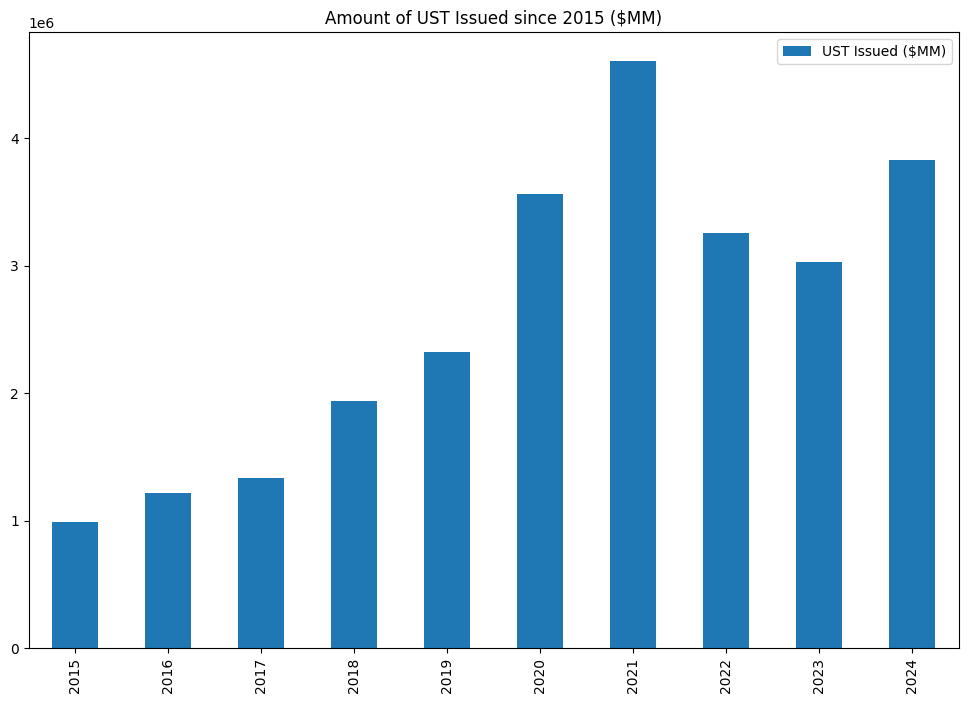

In [399]:
# Make a new data frame
df_ust_issued = pd.DataFrame(columns = ['UST Issued ($MM)'])

for year in range(2015, 2025):
    ref_date_1 = f'{year}-01-01'
    ref_date_2 = f'{year}-12-31'
    
    bond_filtered = bond_issued[(bond_issued.index >= ref_date_1) & (bond_issued.index <= ref_date_2)]
    bond_issued_amount = bond_filtered['amt_out'].sum()
    
    # Add the amount to the dataframe
    df_ust_issued.loc[year,:] = bond_issued_amount

display(df_ust_issued.style.format('{:,}'))

# Bar Chart
df_ust_issued.plot.bar(title='Amount of UST Issued since 2015 ($MM)', figsize=(12,8));

In [400]:
# This is dataframe of UST maturing
bond_maturing = symbology_treasury[['ticker', 'class', 'isin', 'security', 'start_date', 'maturity', 'amt_out']]
bond_maturing.set_index('maturity', inplace=True)
bond_maturing.head(2)

,ticker,class,isin,security,start_date,amt_out
maturity,,,,,,
2020-08-15,T,Govt,US912810EG95,T 8 3/4 08/15/20,1990-08-15,17059.0
2021-02-15,T,Govt,US912810EH78,T 7 7/8 02/15/21,1991-02-15,10076.0


In [401]:
# 2015
ref_date_1 = '2015-01-01'
ref_date_2 = '2015-12-31'

# Take everything between the reference dates
bond_filtered = bond_maturing[(bond_maturing.index >= ref_date_1) & (bond_maturing.index <= ref_date_2)]
display(bond_filtered.head())

bond_maturing_2015 = bond_filtered['amt_out'].sum()
print(f"UST Issued in 2015 ($MM): {bond_maturing_2015:,}")

,ticker,class,isin,security,start_date,amt_out
maturity,,,,,,


UST Issued in 2015 ($MM): 0.0


,UST Maturing ($MM)
2015,0.0
2016,0.0
2017,0.0
2018,0.0
2019,0.0
2020,"609,714.0"
2021,"2,068,029.0"
2022,"2,249,135.0"
2023,"2,631,092.0"
2024,"2,629,231.0"


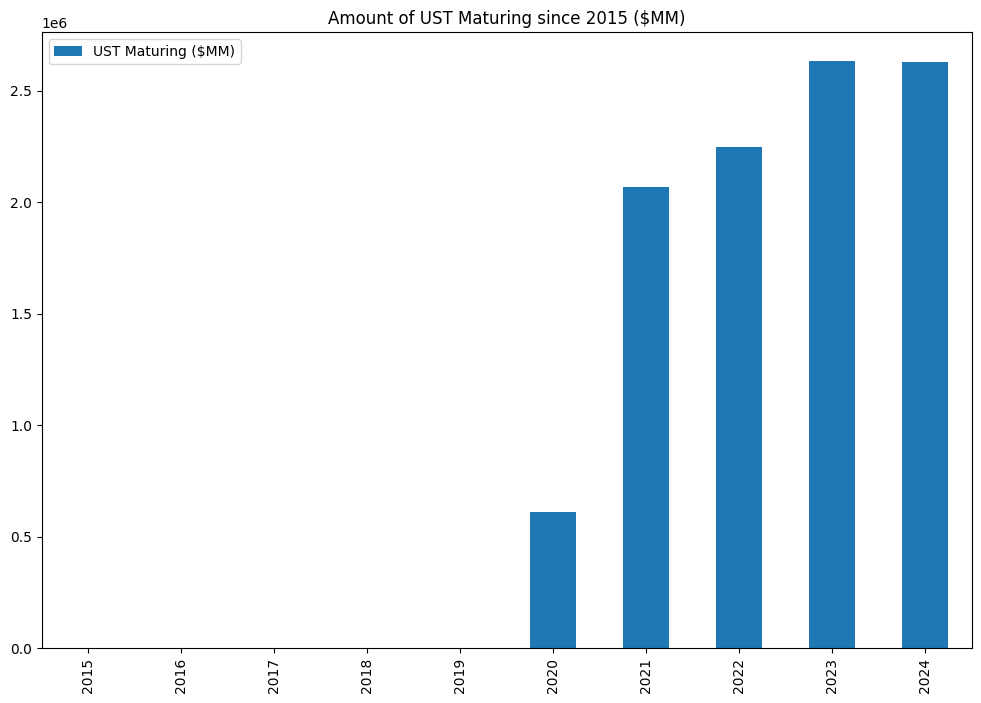

In [402]:
# Make a new dataframe
df_ust_maturing = pd.DataFrame(columns = ['UST Maturing ($MM)'])

for year in range(2015, 2025):
    ref_date_1 = f'{year}-01-01'
    ref_date_2 = f'{year}-12-31'
    
    bond_filtered = bond_maturing[(bond_maturing.index >= ref_date_1) & (bond_maturing.index <= ref_date_2)]
    bond_maturing_amount = bond_filtered['amt_out'].sum()
    
    # Add the amount to the dataframe
    df_ust_maturing.loc[year,:] = bond_maturing_amount
    
display(df_ust_maturing.style.format('{:,}'))

# Bar Chart
df_ust_maturing.plot.bar(title='Amount of UST Maturing since 2015 ($MM)', figsize=(12,8));

,UST Issued ($MM),UST Maturing ($MM)
2015,988924.0,0.0
2016,1217460.0,0.0
2017,1330458.0,0.0
2018,1940847.0,0.0
2019,2322466.0,0.0
2020,3558513.0,609714.0
2021,4601404.0,2068029.0
2022,3251806.0,2249135.0
2023,3028042.0,2631092.0
2024,3827422.0,2629231.0


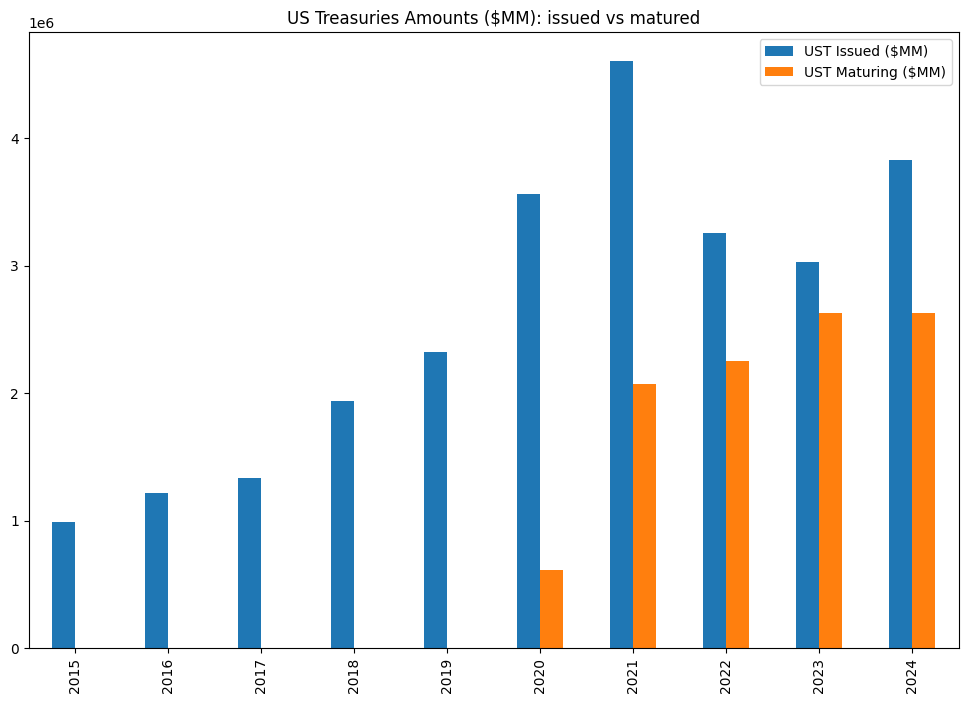

In [403]:
# tsy_amount_issued_and_matured
tsy_amount_issued_and_matured = pd.concat([df_ust_issued, df_ust_maturing], axis=1)
display(tsy_amount_issued_and_matured)

# Plot the results.
tsy_amount_issued_and_matured.plot.bar(title='US Treasuries Amounts ($MM): issued vs matured', figsize=(12,8));

------------------------------------------------------------------------------------------
# Problem 2: Explore symbology for corporate bonds

## a. Load and explore US corporate bonds symbology data

Starting from the `bond_symbology` dataframe, create a corporate bond dataframe containing
* corporate bond only  (class = "Corp"),
* senior unsecured (rank = "Sr Unsecured"),
* fixed coupon (cpn_type="FIXED")
* maturity date <= 2055-12-31

bonds only, with following columns:



| ticker | isin | figi | security | name | coupon | start_date | maturity | amt_out | term | TTM |
|----------|-------|-------|-------------|-----|----------|---------|---------|---------|---------|---------|

where 
* `term` refers to the initial term/time-to-maturity in years
* `TTM` refers to the current time-to-maturity in years

Display the dataframe.

In [404]:
# Symbology Corp = Corporate Bond Dataframe

symbology_corp = bond_symbology[(bond_symbology['class'] == 'Corp') & 
                      (bond_symbology['rank'] == 'Sr Unsecured') &
                      (bond_symbology['cpn_type'] == 'FIXED') & 
                      (bond_symbology['maturity'] <= '2055-12-31')
                      ]
symbology_corp = symbology_corp[['ticker', 'isin', 'figi', 'security', 'name', 'coupon', 'start_date', 'maturity', 'amt_out', 'term', 'TTM']]
symbology_corp

,ticker,isin,figi,security,name,coupon,start_date,maturity,amt_out,term,TTM
0,AAPL,US037833AL42,BBG004HST0K7,AAPL 3.85 05/04/43,APPLE INC,3.850,2013-05-03,2043-05-04,3000.0,30.001369,18.387406
1,AAPL,US037833AT77,BBG006F8VWJ7,AAPL 4.45 05/06/44,APPLE INC,4.450,2014-05-06,2044-05-06,1000.0,30.001369,19.394935
2,AAPL,US037833BA77,BBG0081TNL50,AAPL 3.45 02/09/45,APPLE INC,3.450,2015-02-09,2045-02-09,2000.0,30.001369,20.158795
3,AAPL,US037833BH21,BBG008N1BQC1,AAPL 4 3/8 05/13/45,APPLE INC,4.375,2015-05-13,2045-05-13,2000.0,30.001369,20.413415
4,AAPL,US037833BY53,BBG00C7QB7Q2,AAPL 3 1/4 02/23/26,APPLE INC,3.250,2016-02-23,2026-02-23,3250.0,10.001369,1.196441
...,...,...,...,...,...,...,...,...,...,...,...
129,ORCL,US68389XCP87,BBG01DZ9FPR1,ORCL 4.9 02/06/33,ORACLE CORP,4.900,2023-02-06,2033-02-06,1500.0,10.001369,8.150582
130,ORCL,US68389XCQ60,BBG01DZ9FPY3,ORCL 5.55 02/06/53,ORACLE CORP,5.550,2023-02-06,2053-02-06,2250.0,30.001369,28.150582
131,ORCL,US68389XCS27,BBG01Q0P7VR0,ORCL 4.2 09/27/29,ORACLE CORP,4.200,2024-09-27,2029-09-27,1500.0,4.999316,4.788501
132,ORCL,US68389XCT00,BBG01Q0P7W61,ORCL 4.7 09/27/34,ORACLE CORP,4.700,2024-09-27,2034-09-27,1750.0,9.998631,9.787817


## b. Explore aggregated issue amount outstanding by issuer

Compute the total issue (face) amount outstanding for each issuer and display the results.

Issue amount outstanding refer to those that are issued but haven't matured (maturity date is > today's date). From the filtered dataframe above, all the TTM is > 0, so all of them are still outstanding.

In [405]:
bond_apple = symbology_corp[(symbology_corp['ticker'] == 'AAPL')]
bond_amount_apple = bond_apple['amt_out'].sum()
print(f"Apple Issued ($MM): {bond_amount_apple:,}")

Apple Issued ($MM): 71,100.0


,Ticker,Amount Issued ($MM)
0,AAPL,"71,100.000"
1,DIS,"25,062.036"
2,IBM,"28,284.172"
3,ORCL,"69,240.435"


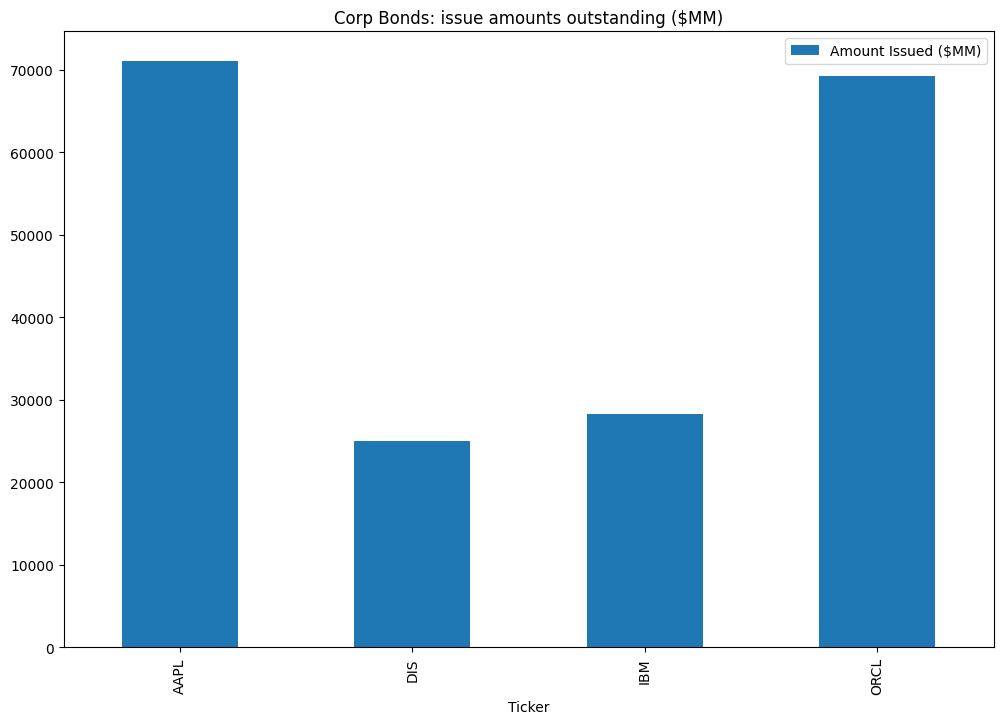

In [406]:
# Group the bonds based on the ticker
bond_issued_amount = symbology_corp.groupby('ticker')['amt_out'].sum()

# Put it into a dataframe
bond_issued_df = bond_issued_amount.reset_index()
bond_issued_df.columns = ['Ticker', 'Amount Issued ($MM)']

# Barc Chart
bond_issued_df.plot.bar(x = "Ticker", title='Corp Bonds: issue amounts outstanding ($MM)', figsize=(12, 8))

# Give comma separator for 1,000
bond_issued_df['Amount Issued ($MM)'] = bond_issued_df['Amount Issued ($MM)'].apply(lambda x: f"{x:,.3f}")

display(bond_issued_df)

## c. Display the bond details for Disney

Create a separate dataframe for Disney issuer only (ticker = 'DIS') and display it.

Compute following aggregated metrics for DIS:
* average coupon
* average term and
* average TTM.

In [407]:
df_disney = symbology_corp[(symbology_corp['ticker'] == 'DIS')]
df_disney

,ticker,isin,figi,security,name,coupon,start_date,maturity,amt_out,term,TTM
43,DIS,USU25497AR66,BBG00N3BD9G0,DIS 7 1/8 04/08/28,WALT DISNEY COMPANY/THE,7.125,2019-03-20,2028-04-08,10.285,9.054073,3.318275
44,DIS,USU25497AW51,BBG00N3BZ921,DIS 8.45 08/01/34,WALT DISNEY COMPANY/THE,8.450,2019-03-20,2034-08-01,1.000,15.367556,9.631759
47,DIS,US254687FL52,BBG00Q5D3237,DIS 2 09/01/29,WALT DISNEY COMPANY/THE,2.000,2019-09-06,2029-09-01,2000.000,9.987680,4.717317
48,DIS,US254687FM36,BBG00Q5D3246,DIS 2 3/4 09/01/49,WALT DISNEY COMPANY/THE,2.750,2019-09-06,2049-09-01,2000.000,29.987680,24.717317
49,DIS,US254687DK97,BBG00QNKGJP6,DIS 3 3/8 11/15/26,WALT DISNEY COMPANY/THE,3.375,2019-11-22,2026-11-15,436.285,6.981520,1.921971
50,DIS,US254687DV52,BBG00QNKP8R8,DIS 6.55 03/15/33,WALT DISNEY COMPANY/THE,6.550,2019-11-22,2033-03-15,342.347,13.311431,8.251882
51,DIS,US254687DZ66,BBG00QNKR4J4,DIS 6.2 12/15/34,WALT DISNEY COMPANY/THE,6.200,2019-11-22,2034-12-15,982.472,15.063655,10.004107
52,DIS,US254687EB89,BBG00QNKRV04,DIS 6.4 12/15/35,WALT DISNEY COMPANY/THE,6.400,2019-11-22,2035-12-15,971.816,16.062971,11.003422
53,DIS,US254687EF93,BBG00QNKSCY8,DIS 6.15 03/01/37,WALT DISNEY COMPANY/THE,6.150,2019-11-22,2037-03-01,320.934,17.273101,12.213552
54,DIS,US254687EH59,BBG00QNKSBB5,DIS 6.65 11/15/37,WALT DISNEY COMPANY/THE,6.650,2019-11-22,2037-11-15,1223.938,17.982204,12.922656


In [408]:
avg_coupon = df_disney['coupon'].mean()
avg_term = df_disney['term'].mean()
avg_TTM = df_disney['TTM'].mean()

print(f"Average Coupon (%): {avg_coupon:.4f}")
print(f"Average Term (years): {avg_term:.4f}")
print(f"Average TTM (years): {avg_TTM:.4f}")

Average Coupon (%): 4.7970
Average Term (years): 17.6622
Average TTM (years): 12.6799


## d. Explore term structure of issue amounts outstanding for Disney.

Plot the issue amount outstanding by TTM for Disney.

In [409]:
df_disney = symbology_corp[(symbology_corp['ticker'] == 'DIS')]
# Set and Sort Index by TTM
df_disney = df_disney.set_index('TTM').sort_index()
df_disney.head()

,ticker,isin,figi,security,name,coupon,start_date,maturity,amt_out,term
TTM,,,,,,,,,,
1.084189,DIS,US254687FV35,BBG00TSCC372,DIS 1 3/4 01/13/26,WALT DISNEY COMPANY/THE,1.750,2020-05-13,2026-01-13,1500.000,5.670089
1.921971,DIS,US254687DK97,BBG00QNKGJP6,DIS 3 3/8 11/15/26,WALT DISNEY COMPANY/THE,3.375,2019-11-22,2026-11-15,436.285,6.981520
2.272416,DIS,US254687FP66,BBG00SMMG3C8,DIS 3.7 03/23/27,WALT DISNEY COMPANY/THE,3.700,2020-03-23,2027-03-23,500.000,6.997947
3.082820,DIS,US254687FW18,BBG00TSCC3H1,DIS 2.2 01/13/28,WALT DISNEY COMPANY/THE,2.200,2020-05-13,2028-01-13,1000.000,7.668720
3.318275,DIS,USU25497AR66,BBG00N3BD9G0,DIS 7 1/8 04/08/28,WALT DISNEY COMPANY/THE,7.125,2019-03-20,2028-04-08,10.285,9.054073


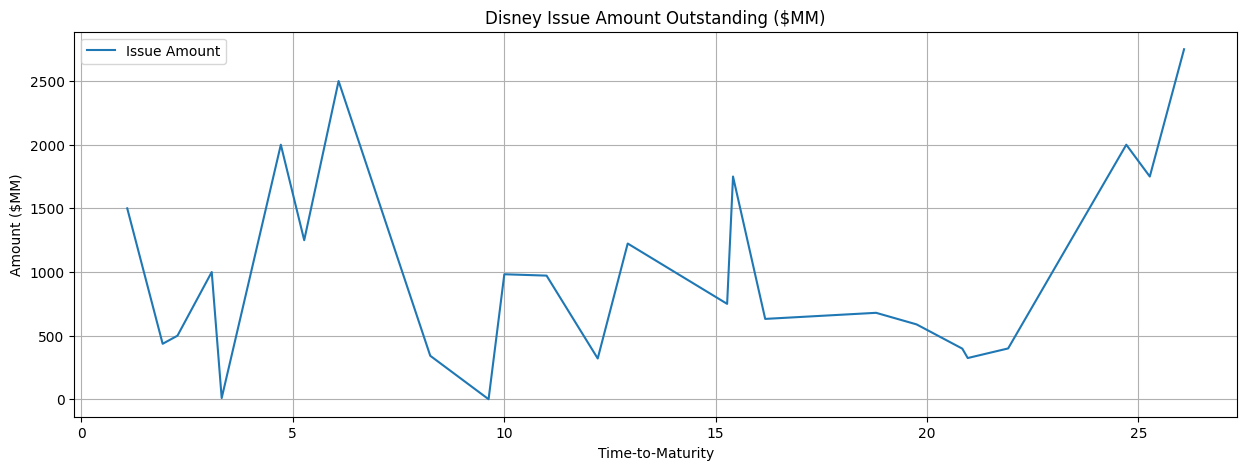

In [410]:
plt.figure(figsize=(15, 5))
plt.plot(df_disney['amt_out'], linestyle='-', label="Issue Amount")

# Labels and title
plt.xlabel("Time-to-Maturity")
plt.ylabel("Amount ($MM)")
plt.title("Disney Issue Amount Outstanding ($MM)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

------------------------------------------------------------------------------------------
# Problem 3: Explore EOD market prices and yields

## a. Load and explore treasury market prices and yields

Load the `bond_market_prices_eod` Excel file into a dataframe. It provides market data for US treasuries and corporate bonds as of 2024-12-13.

Merge the treasuries symbology dataframe with the market data and add the following columns:


| date | bidPrice | askPrice | midPrice | bidYield | askYield | midYield | term | TTM |
|----------|-------|-------------|-----|----------|---------|---------|---------|---------|

Plot a graph/scatter plot of treasury mid yields by TTM.


In [411]:
# Treasury Symbology Dataframe (with Term and TTM)
symbology_treasury.head()

,ticker,class,figi,isin,und_bench_isin,security,name,type,coupon,cpn_type,...,acc_first,maturity,mty_typ,rank,amt_out,country,currency,status,term,TTM
135,T,Govt,BBG000DKHP42,US912810EG95,US9127963M90,T 8 3/4 08/15/20,US TREASURY N/B,US GOVERNMENT,8.750,FIXED,...,1990-08-15,2020-08-15,NORMAL,Unsecured,17059.0,US,USD,INAC,30.001369,0.0
136,T,Govt,BBG000DJN4B7,US912810EH78,NaN,T 7 7/8 02/15/21,US TREASURY N/B,US GOVERNMENT,7.875,FIXED,...,1991-02-15,2021-02-15,NORMAL,Unsecured,10076.0,US,USD,INAC,30.001369,0.0
137,T,Govt,BBG000DHBM88,US912810EJ35,NaN,T 8 1/8 05/15/21,US TREASURY N/B,US GOVERNMENT,8.125,FIXED,...,1991-05-15,2021-05-15,NORMAL,Unsecured,10067.0,US,USD,INAC,30.001369,0.0
138,T,Govt,BBG000DKP182,US912810EK08,NaN,T 8 1/8 08/15/21,US TREASURY N/B,US GOVERNMENT,8.125,FIXED,...,1991-08-15,2021-08-15,NORMAL,Unsecured,9506.0,US,USD,INAC,30.001369,0.0
139,T,Govt,BBG000DFRYP0,US912810EL80,NaN,T 8 11/15/21,US TREASURY N/B,US GOVERNMENT,8.000,FIXED,...,1991-11-15,2021-11-15,NORMAL,Unsecured,30632.0,US,USD,INAC,30.001369,0.0


In [412]:
# Dataframe of market prices
filepath_rawdata = f'./data/bond_market_prices_eod.xlsx'
data_market = pd.read_excel(filepath_rawdata)

data_market['midPrice'] = (data_market['bidPrice'] + data_market['askPrice'])/2
data_market['midYield'] = (data_market['bidYield'] + data_market['askYield'])/2
data_market.head(3) 

,date,class,ticker,isin,figi,bidPrice,askPrice,accrued,bidYield,askYield,midPrice,midYield
0,2024-12-13,Corp,AAPL,US037833BX70,BBG00C7QBG91,93.228,93.809,1.4595,5.180,5.132,93.5185,5.156
1,2024-12-13,Corp,AAPL,US037833EK23,BBG011ZS1X57,63.723,64.232,0.9835,5.242,5.194,63.9775,5.218
2,2024-12-13,Corp,AAPL,US037833DW79,BBG00TN2PN26,63.716,64.215,0.2585,5.253,5.205,63.9655,5.229


In [413]:
# Merged Dataframe
merged_df_treasury = pd.merge(data_market, symbology_treasury, on=['isin', 'class', 'ticker', 'figi'], how='inner')
merged_df_treasury.head()

,date,class,ticker,isin,figi,bidPrice,askPrice,accrued,bidYield,askYield,...,acc_first,maturity,mty_typ,rank,amt_out,country,currency,status,term,TTM
0,2024-12-13,Govt,T,US912810FF04,BBG000FJ0QD9,103.4141,103.8828,0.44925,4.292,4.164,...,1998-11-15,2028-11-15,NORMAL,Unsecured,10947.0,US,USD,ACTV,29.998631,3.923340
1,2024-12-13,Govt,T,US912810FJ26,BBG000FVQ8V4,107.6328,108.1172,2.04690,4.300,4.190,...,1999-08-15,2029-08-15,NORMAL,Unsecured,11179.0,US,USD,ACTV,29.998631,4.670773
2,2024-12-13,Govt,T,US91282CEW73,BBG018FYVLN4,97.6641,97.7109,1.49220,4.229,4.209,...,2022-06-30,2027-06-30,NORMAL,Unsecured,50593.0,US,USD,ACTV,4.999316,2.543463
3,2024-12-13,Govt,T,US912828YX25,BBG00R4RS5F8,95.1641,95.2344,0.80275,4.249,4.211,...,2019-12-31,2026-12-31,NORMAL,Unsecured,35012.0,US,USD,ACTV,7.000684,2.047912
4,2024-12-13,Govt,T,US912828ZE35,BBG00SMNNGR3,92.1875,92.2500,0.13285,4.243,4.213,...,2020-03-31,2027-03-31,NORMAL,Unsecured,36303.0,US,USD,ACTV,6.997947,2.294319


In [414]:
# Set and Sort Index by TTM
merged_df_treasury_sorted_TTM = merged_df_treasury.set_index('TTM').sort_index()
merged_df_treasury_sorted_TTM.head()

,date,class,ticker,isin,figi,bidPrice,askPrice,accrued,bidYield,askYield,...,cpn_first,acc_first,maturity,mty_typ,rank,amt_out,country,currency,status,term
TTM,,,,,,,,,,,,,,,,,,,,,
1.089665,2024-12-13,Govt,T,US91282CGE57,BBG01C84K6V5,99.5586,99.6133,1.62105,4.294,4.242,...,2023-07-15,2023-01-15,2026-01-15,NORMAL,Unsecured,39998.0,US,USD,ACTV,2.995209
1.133470,2024-12-13,Govt,T,US9128286A35,BBG00N6H7CQ3,98.1602,98.2266,0.98430,4.316,4.254,...,2019-07-31,2019-01-31,2026-01-31,NORMAL,Unsecured,31000.0,US,USD,ACTV,7.000684
1.133470,2024-12-13,Govt,T,US91282CBH34,BBG00Z0G3YM4,95.7227,95.7773,0.14060,4.310,4.259,...,2021-07-31,2021-01-31,2026-01-31,NORMAL,Unsecured,69061.0,US,USD,ACTV,4.996578
1.133470,2024-12-13,Govt,T,US91282CJV46,BBG01L3DFJ02,99.9531,99.9961,1.59380,4.289,4.250,...,2024-07-31,2024-01-31,2026-01-31,NORMAL,Unsecured,59997.0,US,USD,ACTV,2.001369
1.174538,2024-12-13,Govt,T,US91282CGL90,BBG01DVKBBT3,99.6367,99.6836,1.33785,4.319,4.277,...,2023-08-15,2023-02-15,2026-02-15,NORMAL,Unsecured,55631.0,US,USD,ACTV,3.000684


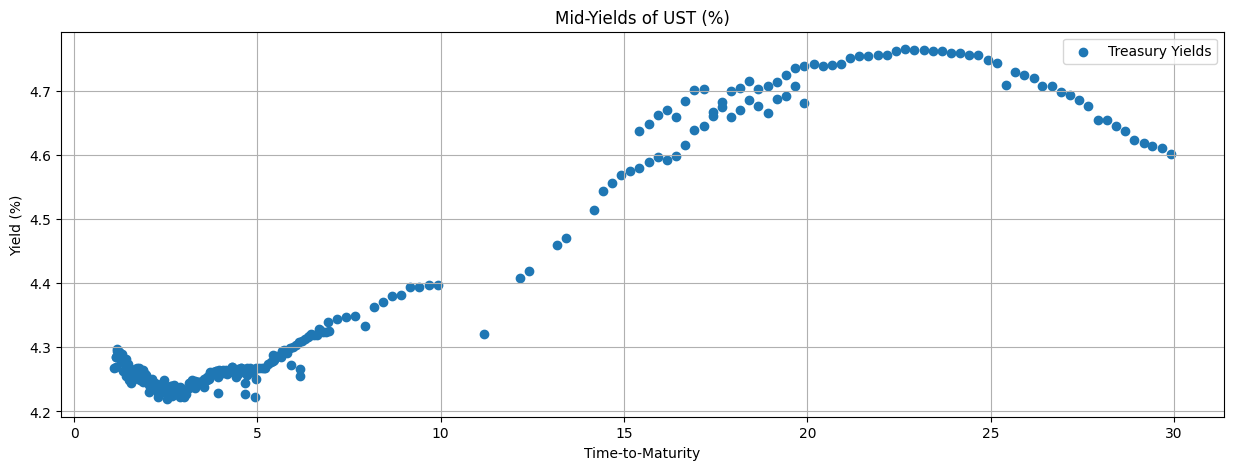

In [415]:
# Input for Scatter Plot
x_values = merged_df_treasury_sorted_TTM[['midYield']].index
y_values = merged_df_treasury_sorted_TTM[['midYield']].values

plt.figure(figsize=(15, 5))
plt.scatter(x_values, y_values, label='Treasury Yields')

# Labels and title
plt.xlabel("Time-to-Maturity")
plt.ylabel("Yield (%)")
plt.title("Mid-Yields of UST (%)")
plt.legend()
plt.grid(True)

## b. Explore on-the-run treasuries only
Create a separate joint dataframe for on-the-run treasuries only.

Plot a graph/scatter plot of on-the-run treasury mid yields by TTM.

In [416]:
# ISIN for On the Run Treasuries
df_ontherun[['isin']]

,isin
0,US91282CLW90
3,US91282CLY56
4,US912810UF39
9,US91282CMB45
10,US912810UE63
15,US91282CMA61
18,US91282CLZ22


In [417]:
# Merged Dataframe
df_treasury_ontherun = pd.merge(merged_df_treasury, df_ontherun[['isin']], on='isin', how='inner')
df_treasury_ontherun

,date,class,ticker,isin,figi,bidPrice,askPrice,accrued,bidYield,askYield,...,acc_first,maturity,mty_typ,rank,amt_out,country,currency,status,term,TTM
0,2024-12-13,Govt,T,US91282CMB45,BBG01R4Z7Y32,99.3750,99.3828,0.01170,4.224,4.221,...,2024-12-15,2027-12-15,NORMAL,Unsecured,58415.0,US,USD,ACTV,2.995209,3.003422
1,2024-12-13,Govt,T,US91282CLY56,BBG01QZFYJV6,100.0000,100.0078,0.18750,4.249,4.245,...,2024-11-30,2026-11-30,NORMAL,Unsecured,73693.0,US,USD,ACTV,1.993155,1.963039
2,2024-12-13,Govt,T,US91282CMA61,BBG01QZFYD58,99.4375,99.4453,0.18160,4.252,4.250,...,2024-11-30,2029-11-30,NORMAL,Unsecured,74761.0,US,USD,ACTV,4.993840,4.963723
3,2024-12-13,Govt,T,US91282CLZ22,BBG01QZFYCF9,98.7969,98.8125,0.18160,4.327,4.324,...,2024-11-30,2031-11-30,NORMAL,Unsecured,46993.0,US,USD,ACTV,6.992471,6.962355
4,2024-12-13,Govt,T,US91282CLW90,BBG01QKHSMP5,98.8125,98.8281,0.36330,4.399,4.397,...,2024-11-15,2034-11-15,NORMAL,Unsecured,91486.0,US,USD,ACTV,9.998631,9.921971
5,2024-12-13,Govt,T,US912810UE63,BBG01QKHSL31,98.3281,98.3594,0.38475,4.603,4.601,...,2024-11-15,2054-11-15,NORMAL,Unsecured,53231.0,US,USD,ACTV,29.998631,29.921971
6,2024-12-13,Govt,T,US912810UF39,BBG01QVTC1Y0,99.2500,99.2813,0.39645,4.683,4.681,...,2024-11-15,2044-11-15,NORMAL,Unsecured,17088.0,US,USD,ACTV,19.953457,19.923340


In [418]:
# Set and Sort Index by TTM
df_treasury_ontherun_sorted = df_treasury_ontherun.set_index('TTM').sort_index()
df_treasury_ontherun_sorted

,date,class,ticker,isin,figi,bidPrice,askPrice,accrued,bidYield,askYield,...,cpn_first,acc_first,maturity,mty_typ,rank,amt_out,country,currency,status,term
TTM,,,,,,,,,,,,,,,,,,,,,
1.963039,2024-12-13,Govt,T,US91282CLY56,BBG01QZFYJV6,100.0000,100.0078,0.18750,4.249,4.245,...,2025-05-31,2024-11-30,2026-11-30,NORMAL,Unsecured,73693.0,US,USD,ACTV,1.993155
3.003422,2024-12-13,Govt,T,US91282CMB45,BBG01R4Z7Y32,99.3750,99.3828,0.01170,4.224,4.221,...,2025-06-15,2024-12-15,2027-12-15,NORMAL,Unsecured,58415.0,US,USD,ACTV,2.995209
4.963723,2024-12-13,Govt,T,US91282CMA61,BBG01QZFYD58,99.4375,99.4453,0.18160,4.252,4.250,...,2025-05-31,2024-11-30,2029-11-30,NORMAL,Unsecured,74761.0,US,USD,ACTV,4.993840
6.962355,2024-12-13,Govt,T,US91282CLZ22,BBG01QZFYCF9,98.7969,98.8125,0.18160,4.327,4.324,...,2025-05-31,2024-11-30,2031-11-30,NORMAL,Unsecured,46993.0,US,USD,ACTV,6.992471
9.921971,2024-12-13,Govt,T,US91282CLW90,BBG01QKHSMP5,98.8125,98.8281,0.36330,4.399,4.397,...,2025-05-15,2024-11-15,2034-11-15,NORMAL,Unsecured,91486.0,US,USD,ACTV,9.998631
19.923340,2024-12-13,Govt,T,US912810UF39,BBG01QVTC1Y0,99.2500,99.2813,0.39645,4.683,4.681,...,2025-05-15,2024-11-15,2044-11-15,NORMAL,Unsecured,17088.0,US,USD,ACTV,19.953457
29.921971,2024-12-13,Govt,T,US912810UE63,BBG01QKHSL31,98.3281,98.3594,0.38475,4.603,4.601,...,2025-05-15,2024-11-15,2054-11-15,NORMAL,Unsecured,53231.0,US,USD,ACTV,29.998631


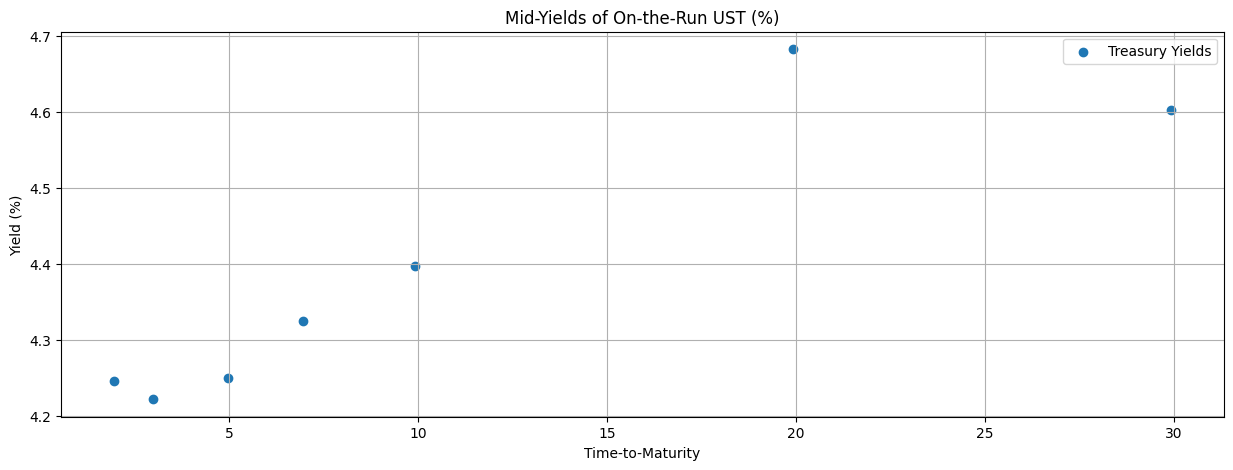

In [419]:
# Input for Scatter Plot
x_values = df_treasury_ontherun_sorted[['midYield']].index
y_values = df_treasury_ontherun_sorted[['midYield']].values

plt.figure(figsize=(15, 5))
plt.scatter(x_values, y_values, label='Treasury Yields')

# Labels and title
plt.xlabel("Time-to-Maturity")
plt.ylabel("Yield (%)")
plt.title("Mid-Yields of On-the-Run UST (%)")
plt.legend()
plt.grid(True)

## c. Load and explore corporate bond market prices and yields

Merge the filtered corporate bonds symbology dataframe with the market data and add the following columns:

| date | bidPrice | askPrice | midPrice | bidYield | askYield | midYield | term | TTM |
|----------|-------|-------------|-----|----------|---------|---------|---------|---------|

List the unique tickers/issuers available in the dataframe.


In [420]:
# Corporate Symbology Dataframe (with Term and TTM)
symbology_corp.head()

,ticker,isin,figi,security,name,coupon,start_date,maturity,amt_out,term,TTM
0,AAPL,US037833AL42,BBG004HST0K7,AAPL 3.85 05/04/43,APPLE INC,3.850,2013-05-03,2043-05-04,3000.0,30.001369,18.387406
1,AAPL,US037833AT77,BBG006F8VWJ7,AAPL 4.45 05/06/44,APPLE INC,4.450,2014-05-06,2044-05-06,1000.0,30.001369,19.394935
2,AAPL,US037833BA77,BBG0081TNL50,AAPL 3.45 02/09/45,APPLE INC,3.450,2015-02-09,2045-02-09,2000.0,30.001369,20.158795
3,AAPL,US037833BH21,BBG008N1BQC1,AAPL 4 3/8 05/13/45,APPLE INC,4.375,2015-05-13,2045-05-13,2000.0,30.001369,20.413415
4,AAPL,US037833BY53,BBG00C7QB7Q2,AAPL 3 1/4 02/23/26,APPLE INC,3.250,2016-02-23,2026-02-23,3250.0,10.001369,1.196441


In [421]:
# Merged Dataframe
merged_df_corp = pd.merge(data_market, symbology_corp, on=['isin', 'figi', 'ticker'], how='inner')
merged_df_corp.head()

,date,class,ticker,isin,figi,bidPrice,askPrice,accrued,bidYield,askYield,midPrice,midYield,security,name,coupon,start_date,maturity,amt_out,term,TTM
0,2024-12-13,Corp,AAPL,US037833BX70,BBG00C7QBG91,93.228,93.809,1.4595,5.180,5.132,93.5185,5.1560,AAPL 4.65 02/23/46,APPLE INC,4.65,2016-02-23,2046-02-23,4000.0,30.001369,21.196441
1,2024-12-13,Corp,AAPL,US037833EK23,BBG011ZS1X57,63.723,64.232,0.9835,5.242,5.194,63.9775,5.2180,AAPL 2.7 08/05/51,APPLE INC,2.70,2021-08-05,2051-08-05,1800.0,29.998631,26.642026
2,2024-12-13,Corp,AAPL,US037833DW79,BBG00TN2PN26,63.716,64.215,0.2585,5.253,5.205,63.9655,5.2290,AAPL 2.65 05/11/50,APPLE INC,2.65,2020-05-11,2050-05-11,2500.0,29.998631,25.407255
3,2024-12-13,Corp,AAPL,US037833EF38,BBG00Z3VQ626,63.262,63.766,0.9420,5.249,5.200,63.5140,5.2245,AAPL 2.65 02/08/51,APPLE INC,2.65,2021-02-08,2051-02-08,3000.0,29.998631,26.154689
4,2024-12-13,Corp,AAPL,US037833CD08,BBG00DHQX9M5,82.278,82.848,1.4120,5.227,5.177,82.5630,5.2020,AAPL 3.85 08/04/46,APPLE INC,3.85,2016-08-04,2046-08-04,2000.0,29.998631,21.639973


In [422]:
# Set and Sort Index by TTM
merged_df_corp_sorted = merged_df_corp.set_index('TTM').sort_index()
merged_df_corp_sorted.head()

,date,class,ticker,isin,figi,bidPrice,askPrice,accrued,bidYield,askYield,midPrice,midYield,security,name,coupon,start_date,maturity,amt_out,term
TTM,,,,,,,,,,,,,,,,,,,
1.084189,2024-12-13,Corp,DIS,US254687FV35,BBG00TSCC372,97.100,97.291,0.7445,4.543,4.356,97.1955,4.4495,DIS 1 3/4 01/13/26,WALT DISNEY COMPANY/THE,1.75,2020-05-13,2026-01-13,1500.0,5.670089
1.149897,2024-12-13,Corp,IBM,US459200KW06,BBG01DMT8922,99.860,100.020,1.6250,4.623,4.477,99.9400,4.5500,IBM 4 1/2 02/06/26,IBM CORP,4.50,2023-02-06,2026-02-06,850.0,3.000684
1.155373,2024-12-13,Corp,AAPL,US037833EB24,BBG00Z3VQ5F4,95.848,95.987,0.2485,4.461,4.331,95.9175,4.3960,AAPL 0.7 02/08/26,APPLE INC,0.70,2021-02-08,2026-02-08,2500.0,4.999316
1.185489,2024-12-13,Corp,IBM,US459200JG74,BBG00C7QBBX5,98.629,98.780,1.1215,4.659,4.524,98.7045,4.5915,IBM 3.45 02/19/26,IBM CORP,3.45,2016-02-19,2026-02-19,1350.0,10.001369
1.196441,2024-12-13,Corp,AAPL,US037833BY53,BBG00C7QB7Q2,98.618,98.771,1.0205,4.455,4.321,98.6945,4.3880,AAPL 3 1/4 02/23/26,APPLE INC,3.25,2016-02-23,2026-02-23,3250.0,10.001369


In [423]:
# Unique Tickers
issuers = merged_df_corp_sorted['ticker'].unique()
print(f"List of Corporate Issuers: {issuers}")

List of Corporate Issuers: ['DIS' 'IBM' 'AAPL' 'ORCL']


## d. Yield curve plots

Plot a graph/scatter plot of mid yield curves by TTM (one line per ticker/issuer).

Add a separate line for on-the-run US treasury yield curve (risk free curve).

What can you say about the credit issuer yields, compared to US treasury yields?

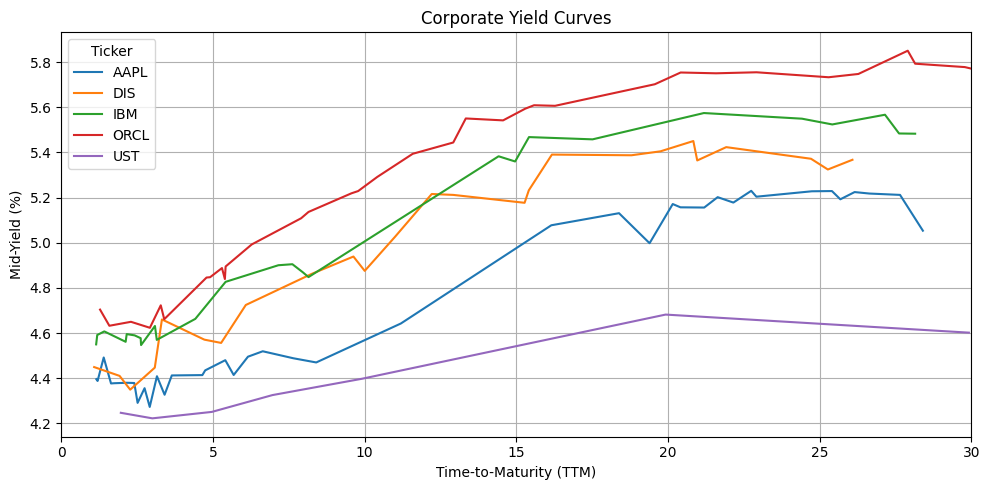

In [424]:
plt.figure(figsize=(10, 5))

# Loop over each ticker group
# ticker: the unique value of the group (e.g., 'AAPL')
# group: the subset DataFrame of rows that belong to that ticker
for ticker, group in merged_df_corp_sorted.groupby('ticker'):
    plt.plot(group.index, group['midYield'], label=ticker)

plt.plot(df_treasury_ontherun_sorted[['midYield']], linestyle='-', label="UST")

# Labels and title
plt.xlabel("Time-to-Maturity (TTM)")
# Show until TTM 30
plt.xlim(0, 30)
plt.ylabel("Mid-Yield (%)")
plt.title("Corporate Yield Curves")
plt.legend(title='Ticker')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

All corporate yields are higher than US Treasury yields in all maturity levels. This make sense because UST are risk-free assets, and so when investors invest in corporate bonds, they have to be compensated for bearing the credit risk. They require a higher yield at all maturity levels, when investing in risky assets such as corporate bonds.

Corporates have a risk of default, and the US government is considered to have virtually 0 default risk.

------------------------------------------------------------------------------------------
# Problem 4: Underying treasury benchmarks and credit spreads

## a. Add underlying benchmark bond mid yields

Start with the corporate bond symbology dataframe. Use the column 'und_bench_yield' to identify the underlying benchmark bond for each bond issue.

Add two new columns to the joint corporate bond dataframe:

| und_bench_yield | credit_spread |
|----------|-------|

where 

*  `und_bench_yield` = underlying benchmark bond mid yield and
*  `credit_spread` = (issue yield - underlying benchmark bond mid yield) * 100.

In [425]:
data_market.head()

df_benchmark_yield = data_market[['isin', 'midYield']]
# rename isin to und_bench_isin
df_benchmark_yield = df_benchmark_yield.rename(columns={'isin': 'und_bench_isin'})
# rename midYield to und_bench_yield
df_benchmark_yield = df_benchmark_yield.rename(columns={'midYield': 'und_bench_yield'})
df_benchmark_yield.head()

,und_bench_isin,und_bench_yield
0,US037833BX70,5.1560
1,US037833EK23,5.2180
2,US037833DW79,5.2290
3,US037833EF38,5.2245
4,US037833CD08,5.2020


In [426]:
symbology_corp = bond_symbology[(bond_symbology['class'] == 'Corp') & 
                      (bond_symbology['rank'] == 'Sr Unsecured') &
                      (bond_symbology['cpn_type'] == 'FIXED') & 
                      (bond_symbology['maturity'] <= '2055-12-31')
                      ]
symbology_corp_v2 = symbology_corp[['isin', 'maturity', 'term',  'TTM', 'und_bench_isin']]
symbology_corp_v2.head()

,isin,maturity,term,TTM,und_bench_isin
0,US037833AL42,2043-05-04,30.001369,18.387406,US912810UF39
1,US037833AT77,2044-05-06,30.001369,19.394935,US912810UF39
2,US037833BA77,2045-02-09,30.001369,20.158795,US912810UF39
3,US037833BH21,2045-05-13,30.001369,20.413415,US912810UF39
4,US037833BY53,2026-02-23,10.001369,1.196441,US91282CLY56


In [427]:
# Merge Dataframes
merged_df_corp_v2 = pd.merge(symbology_corp_v2, df_benchmark_yield, on='und_bench_isin', how='inner')
merged_df_corp_v2.head(3)

,isin,maturity,term,TTM,und_bench_isin,und_bench_yield
0,US037833AL42,2043-05-04,30.001369,18.387406,US912810UF39,4.682
1,US037833AT77,2044-05-06,30.001369,19.394935,US912810UF39,4.682
2,US037833BA77,2045-02-09,30.001369,20.158795,US912810UF39,4.682


In [428]:
data_market.head()

,date,class,ticker,isin,figi,bidPrice,askPrice,accrued,bidYield,askYield,midPrice,midYield
0,2024-12-13,Corp,AAPL,US037833BX70,BBG00C7QBG91,93.228,93.809,1.4595,5.180,5.132,93.5185,5.1560
1,2024-12-13,Corp,AAPL,US037833EK23,BBG011ZS1X57,63.723,64.232,0.9835,5.242,5.194,63.9775,5.2180
2,2024-12-13,Corp,AAPL,US037833DW79,BBG00TN2PN26,63.716,64.215,0.2585,5.253,5.205,63.9655,5.2290
3,2024-12-13,Corp,AAPL,US037833EF38,BBG00Z3VQ626,63.262,63.766,0.9420,5.249,5.200,63.5140,5.2245
4,2024-12-13,Corp,AAPL,US037833CD08,BBG00DHQX9M5,82.278,82.848,1.4120,5.227,5.177,82.5630,5.2020


In [429]:
# Merge Dataframes
merged_df_corp_v3 = pd.merge(merged_df_corp_v2, data_market, on='isin', how='inner')
merged_df_corp_v3.head(3)

,isin,maturity,term,TTM,und_bench_isin,und_bench_yield,date,class,ticker,figi,bidPrice,askPrice,accrued,bidYield,askYield,midPrice,midYield
0,US037833AL42,2043-05-04,30.001369,18.387406,US912810UF39,4.682,2024-12-13,Corp,AAPL,BBG004HST0K7,84.586,85.148,0.449,5.157,5.105,84.867,5.1310
1,US037833AT77,2044-05-06,30.001369,19.394935,US912810UF39,4.682,2024-12-13,Corp,AAPL,BBG006F8VWJ7,92.869,93.617,0.494,5.030,4.966,93.243,4.9980
2,US037833BA77,2045-02-09,30.001369,20.158795,US912810UF39,4.682,2024-12-13,Corp,AAPL,BBG0081TNL50,78.309,78.915,1.217,5.200,5.143,78.612,5.1715


In [430]:
# Merge Dataframes
merged_df_corp_v3['credit_spread'] = (merged_df_corp_v3['midYield'] - merged_df_corp_v3['und_bench_yield']) * 100
merged_df_corp_v3.head(3)

,isin,maturity,term,TTM,und_bench_isin,und_bench_yield,date,class,ticker,figi,bidPrice,askPrice,accrued,bidYield,askYield,midPrice,midYield,credit_spread
0,US037833AL42,2043-05-04,30.001369,18.387406,US912810UF39,4.682,2024-12-13,Corp,AAPL,BBG004HST0K7,84.586,85.148,0.449,5.157,5.105,84.867,5.1310,44.90
1,US037833AT77,2044-05-06,30.001369,19.394935,US912810UF39,4.682,2024-12-13,Corp,AAPL,BBG006F8VWJ7,92.869,93.617,0.494,5.030,4.966,93.243,4.9980,31.60
2,US037833BA77,2045-02-09,30.001369,20.158795,US912810UF39,4.682,2024-12-13,Corp,AAPL,BBG0081TNL50,78.309,78.915,1.217,5.200,5.143,78.612,5.1715,48.95


## b. Credit spread curve plots

Plot a graph/scatter plot of credit spread curves by TTM (one line per issuer).


In [431]:
# Merge Dataframes
df_credit_spread = merged_df_corp_v3[['ticker', 'credit_spread', 'TTM']]
df_credit_spread = df_credit_spread.set_index('TTM').sort_index()
df_credit_spread.head()

,ticker,credit_spread
TTM,,
1.084189,DIS,20.25
1.149897,IBM,30.30
1.155373,AAPL,14.90
1.185489,IBM,34.45
1.196441,AAPL,14.10


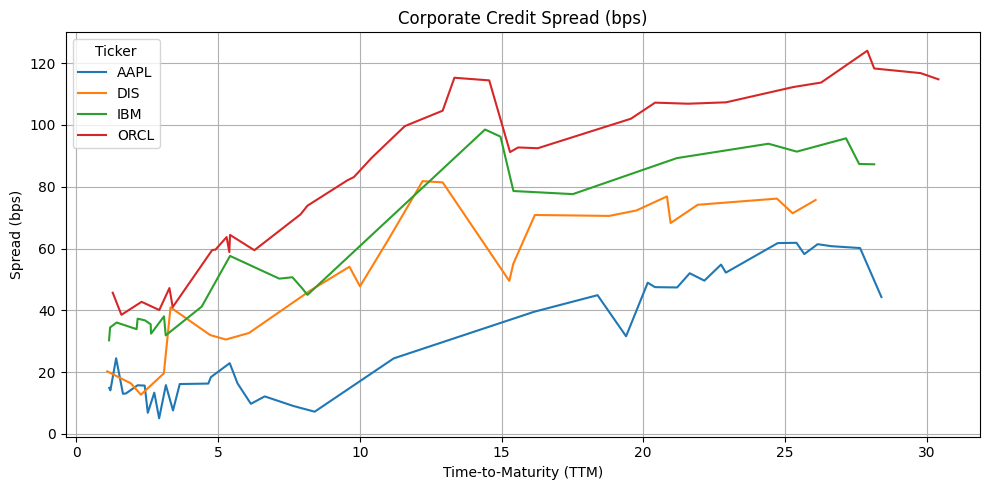

In [432]:
plt.figure(figsize=(10, 5))

# Loop over each ticker group
# ticker: the unique value of the group (e.g., 'AAPL')
# group: the subset DataFrame of rows that belong to that ticker
for ticker, group in df_credit_spread.groupby('ticker'):
    plt.plot(group.index, group['credit_spread'], label=ticker)

# Labels and title
plt.xlabel("Time-to-Maturity (TTM)")
# Show until TTM 30
plt.ylabel("Spread (bps)")
plt.title("Corporate Credit Spread (bps)")
plt.legend(title='Ticker')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

## c. Add g-spreads

Add two new columns to the joint corporate bond dataframe:

| interp_tsy_yield | g_spread |
|----------|-------|

where 

*  `interp_tsy_yield` = interpolated treasury yield (using on-the-run treasuries only), matching the issue maturity
*  `credit_spread` = (issue yield - underlying benchmark bond mid yield) * 100.

In [433]:
# g_spread = issue yield - interp_tsy_yield
merged_df_corp_v3.head()

,isin,maturity,term,TTM,und_bench_isin,und_bench_yield,date,class,ticker,figi,bidPrice,askPrice,accrued,bidYield,askYield,midPrice,midYield,credit_spread
0,US037833AL42,2043-05-04,30.001369,18.387406,US912810UF39,4.682,2024-12-13,Corp,AAPL,BBG004HST0K7,84.586,85.148,0.4490,5.157,5.105,84.8670,5.1310,44.90
1,US037833AT77,2044-05-06,30.001369,19.394935,US912810UF39,4.682,2024-12-13,Corp,AAPL,BBG006F8VWJ7,92.869,93.617,0.4940,5.030,4.966,93.2430,4.9980,31.60
2,US037833BA77,2045-02-09,30.001369,20.158795,US912810UF39,4.682,2024-12-13,Corp,AAPL,BBG0081TNL50,78.309,78.915,1.2170,5.200,5.143,78.6120,5.1715,48.95
3,US037833BH21,2045-05-13,30.001369,20.413415,US912810UF39,4.682,2024-12-13,Corp,AAPL,BBG008N1BQC1,89.877,90.517,0.4010,5.184,5.130,90.1970,5.1570,47.50
4,US037833BY53,2026-02-23,10.001369,1.196441,US91282CLY56,4.247,2024-12-13,Corp,AAPL,BBG00C7QB7Q2,98.618,98.771,1.0205,4.455,4.321,98.6945,4.3880,14.10


In [434]:
# On the Run Treasuries
# This contains maturity
# Use this to interpolate UST on maturity dates in the merged_df_corp
df_treasury_ontherun_v2 = df_treasury_ontherun[['isin', 'maturity', 'midYield']]
df_treasury_ontherun_v2 = df_treasury_ontherun_v2.sort_values('maturity')
df_treasury_ontherun_v2

,isin,maturity,midYield
1,US91282CLY56,2026-11-30,4.2470
0,US91282CMB45,2027-12-15,4.2225
2,US91282CMA61,2029-11-30,4.2510
3,US91282CLZ22,2031-11-30,4.3255
4,US91282CLW90,2034-11-15,4.3980
6,US912810UF39,2044-11-15,4.6820
5,US912810UE63,2054-11-15,4.6020


In [435]:
# These are the dates that I need:
merged_df_corp_v3[['maturity']].head()

,maturity
0,2043-05-04
1,2044-05-06
2,2045-02-09
3,2045-05-13
4,2026-02-23


In [436]:
# Interpolate Treasury yields for corporate TTM
merged_df_corp_v3['interp_tsy_yield'] = np.interp(
    merged_df_corp_v3['maturity'], # unknown x
    df_treasury_ontherun_v2['maturity'], # known x
    df_treasury_ontherun_v2['midYield'] # known y
)
merged_df_corp_v3[['interp_tsy_yield']].head()

,interp_tsy_yield
0,4.638385
1,4.666995
2,4.680116
3,4.678079
4,4.247000


In [437]:
# Interpolate Treasury yields for corporate TTM
merged_df_corp_v3['g_spread'] = (merged_df_corp_v3['midYield'] - merged_df_corp_v3['interp_tsy_yield']) * 100
merged_df_corp_v3[['g_spread']].head()

,g_spread
0,49.261456
1,33.100465
2,49.138390
3,47.892114
4,14.100000


## d. G-spread curve plots

Plot a graph/scatter plot of g-spread curves by TTM (one line per issuer).


In [438]:
# Merge Dataframes
df_g_spread = merged_df_corp_v3[['ticker', 'g_spread', 'TTM']]
df_g_spread = df_g_spread.set_index('TTM').sort_index()
df_g_spread.head()

,ticker,g_spread
TTM,,
1.084189,DIS,20.25
1.149897,IBM,30.30
1.155373,AAPL,14.90
1.185489,IBM,34.45
1.196441,AAPL,14.10


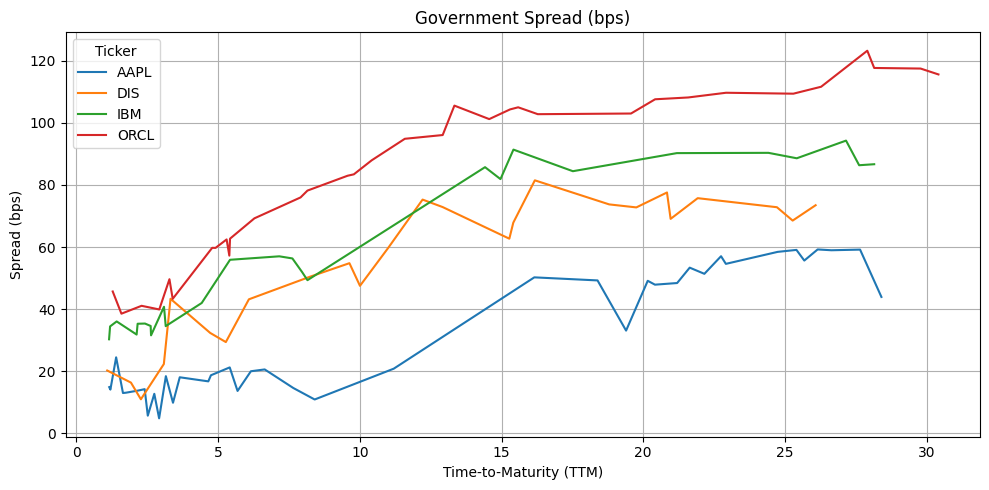

In [439]:
plt.figure(figsize=(10, 5))

# Loop over each ticker group
# ticker: the unique value of the group (e.g., 'AAPL')
# group: the subset DataFrame of rows that belong to that ticker
for ticker, group in df_g_spread.groupby('ticker'):
    plt.plot(group.index, group['g_spread'], label=ticker)

# Labels and title
plt.xlabel("Time-to-Maturity (TTM)")
# Show until TTM 30
plt.ylabel("Spread (bps)")
plt.title("Government Spread (bps)")
plt.legend(title='Ticker')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()